### Vader 감성 분석 라이브러리 활용

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence) #문장의 긍정 점수를 알려주는 함수
    return score

In [2]:
sentiment_analyzer_scores('I am happy.')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [3]:
sentiment_analyzer_scores('I am very happy.')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [4]:
sentiment_analyzer_scores('I am not happy.')

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

neg-부정 감성 점수, neu-중립 감성 점수, pos-긍정 감성 점수, compound-합산 감성 점수

### 리뷰 감성 측정

In [6]:
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')

In [7]:
mobile.iloc[0,4]

'Phone does not work. Does not allow outgoing text . Incoming calls. Would not disable South African settings. Waste of money'

In [8]:
sentiment_analyzer_scores(mobile.iloc[0,4])

{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.6546}

- 감성 스코어 컬럼 생성

In [9]:
sent = []

for i in range(len(mobile)):
    if(pd.isna(mobile.iloc[i,4]) == True): #리뷰가 NA인 곳은 감성 스코어에 0점 부여
        sent.append(0)
    else:
        sent.append(sentiment_analyzer_scores(mobile.iloc[i,4])['compound'])
    
mobile['sentiment_score'] = sent #각 텍스트의 점수를 sent 배열에 저장
mobile.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,sentiment_score
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,-0.6546
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,-0.2533
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,-0.7003
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,0.7351
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,-0.2263


### 감성 사전 활용

In [10]:
import nltk
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()

nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

pos_list

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/fastbat/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


{'fast-growing',
 'coolest',
 'succeeded',
 'supports',
 'yay',
 'reclaim',
 'altruistic',
 'champ',
 'respite',
 'vouch',
 'secure',
 'dashing',
 'reforming',
 'entertains',
 'mesmerizing',
 'simplest',
 'felicitous',
 'irreplaceable',
 'carefree',
 'pamperedness',
 'adroit',
 'cohere',
 'benefit',
 'sustainability',
 'friendly',
 'extol',
 'civility',
 'cheapest',
 'fascinate',
 'beneficent',
 'supurbly',
 'prosperous',
 'veritable',
 'advanced',
 'revelation',
 'civilize',
 'exultingly',
 'humorously',
 'enchanted',
 'faithfully',
 'compactly',
 'brisk',
 'conveniently',
 'welcome',
 'renewed',
 'user-friendly',
 'dominates',
 'silent',
 'liked',
 'whooa',
 'simplifies',
 'thrills',
 'wellbeing',
 'satisfactorily',
 'optimal',
 'lucrative',
 'invaluable',
 'rock-stars',
 'sweeten',
 'insightfully',
 'upliftment',
 'durable',
 'hearten',
 'peps',
 'whoa',
 'playfully',
 'eye-catch',
 'enthralled',
 'shine',
 'virtuous',
 'deginified',
 'infallible',
 'infallibility',
 'suavely',
 'ex

In [11]:
neg_list

{'indignant',
 'd*mn',
 'capricious',
 'injudicious',
 'excruciatingly',
 'simplistically',
 'tempest',
 'frenzied',
 'shortage',
 'strident',
 'musty',
 'acrimoniously',
 'insult',
 'moot',
 'oversize',
 'peevish',
 'grainy',
 'recoil',
 'yawn',
 'rumple',
 'incognizant',
 'lost',
 'interfere',
 'ridicule',
 'impetuous',
 'deprived',
 'undone',
 'boring',
 'spookiest',
 'venomous',
 'listless',
 'mock',
 'stab',
 'loose',
 'immodest',
 'bearish',
 'subdued',
 'incense',
 'satirical',
 'shrew',
 'dents',
 'opposition',
 'uproariously',
 'disarm',
 'subtract',
 'racism',
 'prickle',
 'degeneration',
 'ridiculous',
 'adamant',
 'compulsion',
 'regression',
 'disagreed',
 'dismissively',
 'irksomenesses',
 'dwindling',
 'hesitant',
 'qualms',
 'stupid',
 'chronic',
 'poor',
 'bombastic',
 'hideously',
 'complained',
 'insubstantial',
 'silly',
 'quarrelsome',
 'quash',
 'frightful',
 'idiocy',
 'incessant',
 'irrepressible',
 'complication',
 'ingrate',
 'polluters',
 'fear',
 'smelly',
 

In [12]:
from nltk.tokenize import treebank

tokenizer = treebank.TreebankWordTokenizer() #nltk 라이브러리에 포함된 tokenizer

def sentiment(sentence):
      senti=0
          words = [word.lower() for word in tokenizer.tokenize(sentence)]
    for word in words:
        if word in pos_list:
              senti += 1
        elif word in neg_list:
              senti -= 1
    return senti
#소문자로 변경, tokenize
#긍정단어 리스트에 있으면 +1, 부정단어 리스트에 있으면 -1
#긍정 단어 수 - 부정 단어 수 = 리뷰 감성 스코어

from tqdm import *

mobile['sentiment_dict'] = 0
x = len(mobile)

for i in tqdm(range(0,x)):
    if(pd.isnull(mobile.iloc[i,4])) :
        mobile.iloc[i,7] = 0
    else :
        mobile.iloc[i,7] =  sentiment(mobile.iloc[i,4])

mobile.head()

100%|██████████| 2000/2000 [00:01<00:00, 1213.05it/s]


,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,sentiment_dict
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,-2
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,2
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,-1
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,-1


- 한글 감성 사전 활용 감성 분석

In [14]:
import json

class KnuSL():

     def data_list(wordname):
              with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
                data = json.load(f)
                result = ['None','None']
                for i in range(0, len(data)):
                if data[i]['word'] == wordname:
    result.pop()
    result.pop()
    result.append(data[i]['word_root'])
    result.append(data[i]['polarity'])
#단어를 입력하면 사전에서 단어와 극성 점수를 찾아줌

  r_word = result[0]
      s_word = result[1]

          print('어근 : ' + r_word)
              print('극성 : ' + s_word)

    
      return r_word, s_word

if __name__ == "__main__":

     ksl = KnuSL
 
 print("\nKNU 한국어 감성사전입니다~ :)")
     print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
         print("종료하시려면 #을 입력해주세요!!!")
             print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
                 print("\n")	

                     while(True):
                              wordname = input("word : ")
                                  wordname = wordname.strip(" ")
                                      if wordname != "#":
                                               print(ksl.data_list(wordname))
                                                    print("\n")


                                                      elif wordname == "#":
                                                               print("\n이용해주셔서 감사합니다~ :)")
                                                                           break


KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정


word : 우울하다
어근 : 우울
극성 : -2
('우울', '-2')


word : 행복하다
어근 : 행복
극성 : 2
('행복', '2')


word : 사랑스럽다
어근 : 사랑
극성 : 2
('사랑', '2')


word : #

이용해주셔서 감사합니다~ :)


In [15]:
import json
import pandas as pd
import konlpy

endgame = pd.read_csv('data/endgame.csv')
endgame.head()

from konlpy.tag import *

okt = Okt()

endgame['sentiment'] = 0

def sent_list(wordname):
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        s_word = result[1]

        return s_word

from tqdm import *
review_length = len(endgame)

for j in tqdm(range(0, review_length)):
    words = okt.pos(endgame.iloc[j,1])
    x = len(words)
    sent_sum = 0

    for i in range(0,x):
        sent = sent_list(words[i][0])
        if( sent != 'None'):
            sent_sum += int(sent)
    
    endgame.iloc[j,2] = sent_sum

endgame.head()


100%|██████████| 4525/4525 [21:38<00:00,  3.48it/s]  


,Rating,Text,sentiment
0,10,\n ...,2
1,10,\n ...,0
2,7,\n,0
3,0,\n,0
4,10,\n ...,4


### 감성 사전 만들기

In [16]:
import nltk
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()
mobile = mobile.dropna()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english'
                     ,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(mobile['Texts'])
#소문자로 변경
#영어 불용어 제거
#Unigram 단위로 분석
#정규표현식을 활용한 tokenize
#단어 문서 매트릭스의 원소는 빈도 수를 사용
    
X = text_counts
y = mobile.iloc[:,6]

In [17]:
ridge_reg = RidgeClassifier(alpha = 1, solver="sag")
ridge_reg.fit(X,y)

ridge_reg.coef_ #단어별 계수값

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:556: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


array([[-0.11999397, -0.06131117,  0.00184613, ..., -0.01023937,
         0.00813656, -0.00247731]])

In [19]:
pred = ridge_reg.predict(X)

from sklearn.metrics import precision_score, recall_score, f1_score

#precision_score(y,pred)
#recall_score(y,pred)
f1_score(y,pred) #긍정/부정 분류 F1 점수

0.9835575485799701

In [20]:
text_counts
a = pd.DataFrame(text_counts.todense())
a 

,0,1,2,3,4,5,6,7,8,9,...,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import sklearn.feature_extraction

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
ngram_size = 1

vectorizer = sklearn.feature_extraction.text.CountVectorizer(
        lowercase=True,stop_words='english',ngram_range = (1,1),
        tokenizer = token.tokenize)

vect = vectorizer.fit(mobile['Texts'])
print('vect.get_feature_names(): {0}'.format(vect.get_feature_names()))

len(vect.get_feature_names()) # 7623

vect.get_feature_names(): ['0', '00', '000', '0000000', '00pm', '01', '01usd', '02', '03', '06', '08', '0gb', '1', '10', '100', '1000', '100min', '100s', '102', '1020', '1080', '1080p', '10bmp', '10conclussions', '10gb', '10mbps', '10positives', '10th', '11', '112gm', '113', '1136', '115', '11oz', '11pm', '11th', '12', '120', '1200', '122', '128', '1280', '1280x720', '1280x800', '128gb', '129', '12th', '12yr', '13', '130', '139', '13mb', '14', '140', '142cm', '143', '145', '145g', '149', '14th', '15', '150', '152', '1520', '16', '160', '1600', '1600x900', '168', '16gb', '16gbmy', '16hrs', '16mp', '16th', '17', '178', '179', '17bday', '18', '180', '1800', '189', '18th', '19', '1900', '190mb', '1920', '1920x1080', '199', '1999', '19th', '1a', '1at', '1cm', '1gb', '1hour', '1in', '1mm', '1st', '1yr', '2', '20', '200', '2000', '2001', '2007', '2008', '200k', '2010', '20101014901', '2011', '2012', '20120510035744301', '2013', '2014', '2014i', '2015', '2070', '209gm', '20ea', '20mb', '20mp',

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


7623

In [24]:
vect.get_feature_names()[np.argmax(ridge_reg.coef_)] #계수값이 가장 큰 단어

'thank'

In [25]:
vect.get_feature_names()[np.argmin(ridge_reg.coef_)]  #계수값이 가장 작은 단어

'horrible'

### 토픽 모델링

In [1]:
#pip install pyLDAvis

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/mobile2014.csv')
df.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0


In [2]:
# 리스트로 변환
data = df.Texts.values.tolist()

pprint(data[:1])

['Phone does not work. Does not allow outgoing text . Incoming calls. Would '
 'not disable South African settings. Waste of money']


In [4]:
# 영어 리뷰에서 단어로 분할해 주는 함수

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(data)) 
print(data_words[:1])

[['phone', 'does', 'not', 'work', 'does', 'not', 'allow', 'outgoing', 'text', 'incoming', 'calls', 'would', 'not', 'disable', 'south', 'african', 'settings', 'waste', 'of', 'money']]


In [6]:
## 표제어 추출 함수 (명사, 형용사, 동사, 부사)

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
# For windows: pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-deps

In [8]:
nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:2])

['phone do not work do not allow outgoing text incoming call would not disable south african setting waste money', 'be not satisfied iphone buy unlocked iphone one recieve be not unlocked be not any more could tell how will solve problem despiste decision want yo tell be completely not satisfied product']


In [10]:
# 빈도 기반 단어 문서 매트릭스 생성

vectorizer = CountVectorizer(
    analyzer='word',
    min_df=10, #  최소 등장 회수 10회 이상 단어
    stop_words='english', # 영어 불용어 제거
    lowercase=True, # 소문자로 변경                                                
    token_pattern='[a-zA-Z0-9]{2,}'
)

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [11]:
# 토픽 10개 LDA 실행

NUM_TOPICS = 10
lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    max_iter=10,
    learning_method='online',
    random_state=100,
    batch_size=128,
    evaluate_every = -1,
    n_jobs = -1,               
)

lda_output = lda_model.fit_transform(data_vectorized)

In [12]:
log = lda_model.score(data_vectorized)
print(log)

-305433.37621654075


In [13]:
per = lda_model.perplexity(data_vectorized)
print(per)

443.0475402924089


In [15]:
# 문서별 대표 토픽 및 토픽에 속할 확률

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.01,0.01,0.01,0.01,0.01,0.34,0.01,0.57,0.01,0.01,7
Doc1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.95,9
Doc2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.53,0.4,0.01,7
Doc3,0.13,0.01,0.01,0.07,0.01,0.01,0.01,0.01,0.76,0.01,8
Doc4,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.85,0.02,8
Doc5,0,0,0,0,0,0,0.96,0,0,0,6
Doc6,0.01,0.01,0.11,0.01,0.01,0.01,0.84,0.01,0.01,0.01,6
Doc7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.92,0.01,8
Doc8,0,0,0,0,0,0,0.7,0,0.28,0,6
Doc9,0,0.2,0,0.1,0,0,0,0,0.68,0,8


In [16]:
# 토픽에 속한 단어 

def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['samsung', 'sim', 'card', 'galaxy', 'note', 'come', 'product',
        'company', 'good', 'feature', 'version', 'know', 'order', 'big',
        'device'], dtype='<U13'),
 array(['phone', 'camera', 'good', 'screen', 'use', 'app', 'battery',
        'android', 'great', 'fast', 'price', 'gb', 'htc', 'quality',
        'size'], dtype='<U13'),
 array(['activate', 'contract', 'fee', 'trouble', 'mother', 'spot',
        'coverage', 'rep', 'sit', 'business', 'worried', 'worry',
        'opinion', 'advertise', 'charge'], dtype='<U13'),
 array(['att', 'receive', 'write', 'weight', 'bring', 'return',
        'disappoint', 'send', 'equipment', 'band', 'dead', 'upset',
        'mobile', 'code', 'compatible'], dtype='<U13'),
 array(['phone', 'recommend', 'price', 'good', 'picture', 'upgrade',
        'amazon', 'plan', 'verizon', 'service', 'blu', 'great', 'product',
        'wireless', 'support'], dtype='<U13'),
 array(['money', 'don', 'waste', 'work', 'waist', 'present', 'send',
        'nu

In [17]:
# 토픽 모델링 결과 시각화

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

/Users/fastbat/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.097196 -0.047440       1        1  33.867319
8     -0.104854 -0.053104       2        1  25.150260
1     -0.150894 -0.054756       3        1  19.402340
4     -0.135616 -0.101565       4        1   7.669379
0     -0.107312  0.065690       5        1   4.995851
7     -0.075608  0.090241       6        1   3.988537
3      0.110839  0.063463       7        1   1.705078
5      0.285642 -0.237412       8        1   1.285353
9      0.156401  0.260213       9        1   1.198225
2      0.118595  0.014671      10        1   0.737657, topic_info=    Category         Freq         Term        Total  loglift  logprob
843  Default   749.000000         work   749.000000  30.0000  30.0000
207  Default   326.000000          don   326.000000  29.0000  29.0000
463  Default   275.000000        money   275.000000  28.0000  28.0000
88   Default   625.000000          buy   625.000000  27.0000  27.0000
643  Default   254.000000      samsung   254.000000  26.0000  26.0000
95   Default   263.000000         card   263.000000  25.0000  25.0000
794  Default   145.000000     unlocked   145.000000  24.0000  24.0000
675  Default   196.000000          sim   196.000000  23.0000  23.0000
600  Default   182.000000      receive   182.000000  22.0000  22.0000
23   Default   248.000000      android   248.000000  21.0000  21.0000
569  Default   246.000000      product   246.000000  20.0000  20.0000
295  Default   161.000000       galaxy   161.000000  19.0000  19.0000
605  Default   262.000000    recommend   262.000000  18.0000  18.0000
633  Default   184.000000       return   184.000000  17.0000  17.0000
238  Default   156.000000    excellent   156.000000  16.0000  16.0000
823  Default    94.000000        waste    94.000000  15.0000  15.0000
480  Default   356.000000          new   356.000000  14.0000  14.0000
7    Default    80.000000     activate    80.000000  13.0000  13.0000
145  Default    84.000000     contract    84.000000  12.0000  12.0000
369  Default   312.000000       iphone   312.000000  11.0000  11.0000
528  Default  3999.000000        phone  3999.000000  10.0000  10.0000
125  Default   284.000000         come   284.000000   9.0000   9.0000
562  Default   325.000000        price   325.000000   8.0000   8.0000
657  Default   158.000000         send   158.000000   7.0000   7.0000
566  Default   254.000000      problem   254.000000   6.0000   6.0000
303  Default   808.000000         good   808.000000   5.0000   5.0000
91   Default   389.000000       camera   389.000000   4.0000   4.0000
28   Default   308.000000          app   308.000000   3.0000   3.0000
193  Default   175.000000       device   175.000000   2.0000   2.0000
458  Default   119.000000       mobile   119.000000   1.0000   1.0000
..       ...          ...          ...          ...      ...      ...
726  Topic10     1.288531        stock    37.055628   1.5505  -5.6593
61   Topic10     0.145831       beware     9.032590   0.7833  -7.8381
363  Topic10     0.145789  instruction     9.341854   0.7493  -7.8384
15   Topic10     0.145899       advise     9.585735   0.7243  -7.8376
356  Topic10     0.146088       inform     9.958663   0.6875  -7.8363
635  Topic10     0.145856   ridiculous    10.042211   0.6775  -7.8379
152  Topic10     0.145826    correctly    10.157844   0.6659  -7.8381
171  Topic10     0.145843    customize    10.232705   0.6586  -7.8380
332  Topic10     0.145788          hit    10.352100   0.6467  -7.8384
665  Topic10     0.145877        shape    10.381056   0.6445  -7.8378
120  Topic10     0.145836        click    10.410722   0.6413  -7.8381
466  Topic10     0.145815      morning    10.417649   0.6405  -7.8382
46   Topic10     0.145839        awful    10.421762   0.6403  -7.8380
725  Topic10     0.145831      sticker    10.487967   0.6339  -7.8381
107  Topic10     1.961252       charge   246.170904   0.0770  -5.2392
784  Topic10     0.

In [18]:
# 최적 토픽 수 찾기 - Perplexity 

log_list = []
per_list = []
k_list = []
for i in range(2,21):
    NUM_TOPICS = i
    lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,               
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        n_jobs = -1,               
                    )
    lda_output = lda_model.fit_transform(data_vectorized)
    log = lda_model.score(data_vectorized)
    per = lda_model.perplexity(data_vectorized)
    log_list.append(log)
    per_list.append(per)
    k_list.append(NUM_TOPICS)
    print(NUM_TOPICS)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


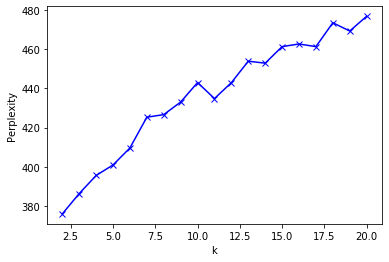

In [19]:
df = pd.DataFrame({'k': k_list, 'log': log_list, 'perplexity': per_list})

plt.plot(df.k, df.perplexity, 'bx-')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.show()

- 토픽 수가 작을 수록 perplexity 지표 값이 낮으므로 작은 수를 토픽 수로 선정하여야 한다. 
- 2부터 6까지는 perplexity 값이 큰 차이가 있지는 않으므로 각각의 경우에 따라 토픽을 구해보고 적합한 토픽 수를 파악해야 한다. 

### 연습문제 (1)

- 속성기반 감성 점수 분석 방안은 “구매후기 한 줄에 고객의 이런 속마음이” 마케팅 난제, 속 시원히 풀어주는 분석 (동아비즈니스리뷰, 2018년 11월 Issue 2) ^[https://dbr.donga.com/article/view/1202/article_no/8891]^를 참조하면 많은 인사이트를 얻을 수 있다. 

- 분석을 위해서 화장품 리뷰 사이트인 글로우픽에서 이니스프리의 ‘스킨 클리닉 마스크 - 마데카소사이드’ (https://www.glowpick.com/product/41100)에 대한 리뷰 100개를 수집하였다. 
- 글로우픽은 제품에 대한 평가를 긍정적인 것 부터 부정적인 것 까지 짱짱!, 굿굿!, 쏘쏘!, 별로!, 최악! 으로 분류하고 있는데, 각각 20개씩의 리뷰를 수집하였다.

- 해당 제품의 속성 간단하게 보습, 제형, 트러블로 구분했고 각 속성에 해당하는 단어는 임의로 다음과 같이 설정하였다. 속성의 구분과 속성에 해당하는 단어의 선정은 해당 분야의 전문가가 등장하는 단어들을 가지고 설정하면 된다. 

- 보습(humid): 보습, 촉촉, 진정, 수분
- 제형(material): 제형, 팩, 크림, 액체
- 트러블(trouble): 여드름, 뾰루지, 좁쌀, 트러블

- 수집한 리뷰 beauty.csv를 불러들여서 한 리뷰를 문장으로 나누고, 문장을 형태소로 구분한다. 각 형태소가 속성 단어에 매칭되는 수를 가지고, 해당 리뷰는 가장 많이 매칭되는 속성에 분류한다. 그 후에 문장에 대한 감성 점수를 계산하고 속성에 분류된 리뷰들의 감성 점수 평균을 구하는 방안이다. 

In [29]:
import numpy as np
import pandas as pd
import json
from tqdm import *

# url = 'https://www.glowpick.com/product/41100'
beauty = pd.read_csv('data/beauty.csv')
beauty.head()

,review,rating
0,이거 진짜 좋아여!! 피부에 뭐 안좋은거가 생기면 진짜 기달리기 바쁜데 이건 한번 ...,5
1,이번에 여드름이랑 뾰루지가 폭팔해서 너무스트레스였습니다..ㅠㅠ평소잘쓰던 스킨케어가 ...,5
2,"사용감은 얘가 최고에요. 끈적이지 않고, 진정과 수분공급도 가능한데 가격까지 상대적...",5
3,"수부지, 지성, 트러블, 홍조, 속당김은 무조건 얘에요 얘! 환절기에 가을로접어들면...",5
4,마이원앤온리마스크팩..! 흑흑 정말 너무 좋습니다 티트리가 잘 안맞는 피부라 트러블...,5


In [30]:
from konlpy.tag import *

okt = Okt()

humid = ['보습','촉촉','진정','수분']
material = ['제형','팩','크림','액체']
trouble = ['여드름','뾰루지','좁쌀','트러블']

def sent_list(wordname):
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        s_word = result[1]

        return s_word

# 문장 구분 
from nltk.tokenize.punkt import PunktSentenceTokenizer

sentence_splitter = PunktSentenceTokenizer()
sentences = sentence_splitter.tokenize(beauty.iloc[0,0])
sentences

['이거 진짜 좋아여!!',
 '피부에 뭐 안좋은거가 생기면 진짜 기달리기 바쁜데 이건 한번 사용하면 바로 없어지니깐 진짜 좋아요!!!',
 '친구가 추천해줘서 사용해봤는데 진짜 좋은게 맞는것같아요!!!',
 '진짜 모두 사용해보세여!',
 '!']

In [31]:
# 형태소 분석
for sentence in sentences :
    print(okt.morphs(sentence))

## 속성 감성 스코어 계산

hu = []
ma = []
tr = []
var_names = ['h', 'm', 't']

for i in tqdm(range(len(beauty))):
    sentences = sentence_splitter.tokenize(beauty.iloc[i,0])

    for sentence in sentences :
        h = 0
        m = 0
        t = 0
        words = okt.morphs(sentence)
    
        for word in words:
            if(word in humid):
                h += 1
        
            if(word in material):
                m += 1
            
            if(word in trouble):
                t += 1
        
        words = okt.pos(sentence)
        x = len(words)
        sent_sum = 0

        #단어에 대한 감성 점수 파악
        for i in range(0,x):
            sent = sent_list(words[i][0])
            if( sent != 'None'):
                sent_sum += int(sent)
        
        #lambda is a small anonymous function
        # zip var_names, values and then max 
        max_var = max(zip(var_names, (map(eval, var_names))), key=lambda tuple: tuple[1])[0]
        
        # tied is not considered to make it simple
        if (max_var == 'h'):
            if( h > 0):
                hu.append(sent_sum)
        elif (max_var == 'm'):
            if( m > 0):
                ma.append(sent_sum)
        elif (max_var == 't'):
            if( t > 0):
                tr.append(sent_sum)

print(np.mean(hu)) 
print(np.mean(ma)) 
print(np.mean(tr)) 

  0%|          | 0/100 [00:00<?, ?it/s]

['이', '거', '진짜', '좋아여', '!!']
['피부', '에', '뭐', '안좋은', '거가', '생기', '면', '진짜', '기', '달리기', '바쁜데', '이건', '한번', '사용', '하면', '바로', '없어지니깐', '진짜', '좋아요', '!!!']
['친구', '가', '추천', '해줘서', '사용', '해봤는데', '진짜', '좋', '은', '게', '맞는것', '같아요', '!!!']
['진짜', '모두', '사용', '해보세여', '!']
['!']


100%|██████████| 100/100 [01:16<00:00,  1.30it/s]

0.5454545454545454
0.13636363636363635
0.25


- 문장을 기준으로 보습 humid, 제형 material, 트러블 trouble에 속한 단어의 수를 세고 세 분야중에서 가장 많은 단어가 포함된 속성으로 문장을 분류한다. 
해당 문장의 감성점수를 계산하여 각 속성의 감성값에 넣어주며, 모든 리뷰에 대한 계산이 종료된 후에 각 속성별 평균 감성 점수 값을 구하였다. 

### 연습문제 (2)

In [20]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/endgame.csv')
df.head()

,Rating,Text
0,10,\n ...
1,10,\n ...
2,7,\n
3,0,\n
4,10,\n ...


In [21]:
# Convert to list
data = df.Text.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' 마무리까지 완벽했다 그 전 인피니티워의 감동과 대적할만한 내 인생 히어로물 희대의 명작 중 하나!! ']


<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<ipython-input-21-4d44c71e79a9>:5: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [22]:
# 엔드게임 리뷰에서 명사만 추출 

from konlpy.tag import *
from nltk import Text

okt = Okt()

data_morph = []
for i in range(len(data)):
    data_morph.append(" ".join(okt.nouns(data[i])))

data_morph

['마무리 그 전 인피니티 워 감동 대적 내 인생 히어로 물 대의 명작 중 하나',
 '토니스타크 인생 명작',
 '',
 '',
 '마블 영화 마지막 종지부 영화 가슴 웅장 실화 마블 전설 그 마블 영웅 강해진 습보 내 감격',
 '진짜 마블 마블',
 '집 진짜 꿀잼',
 '더 이상 어쩌라구',
 '',
 '댓글 그냥 점주 니 영화 평가 수준',
 '와칸 포에버',
 '나 빽 투 더 퓨쳐 캡틴 마블',
 '마지막 아이언맨 슬픔',
 '고인 명복',
 '볼거리 천국',
 '',
 '블랙 팬서',
 '',
 '명복',
 '명작',
 '반지의제왕 이후 시리즈 물 최고 마블 시리즈 나 청춘 안녕',
 '',
 '자식새끼 지구 역사상 전세계 불멸 신화 창조 판타지 액션영화 티켓 지네 가게 저녁식사 제공 판국 도리어 그냥 보지 튀어 만행 정신병 싸이코패스 새끼 때문 코로나 바이러스 도둑 놈 새끼 집안 몰살 이 영화 처럼 지구 전체 인류 절반 이 바이러스 파멸 저주',
 '최고',
 '',
 '떡 영화 애니메이션 영환',
 '도입 부가 시간',
 '예고편 인피니티 워 생각 설정 구멍 떡밥 등 눈 부분 후속작 개편 수',
 '아이언맨 왜',
 '시간 자본 부어 백투더퓨쳐',
 '',
 '다시 보아 재미나 스타크 죽 별',
 '팬서비스 하나 영화 엔딩 작품 유종 보기 점 정도 영화',
 '',
 '세계 히어로 물이 그동안 떡밥 한번 정리 왜 인피니티 워 스트 레인지 토니',
 '',
 '전혀 유종 블록버스터 영화 역대 시리즈',
 '',
 '상영 시간 금방 삭제 마법 경험 함',
 '영화',
 '아이언맨',
 '유종 생각 함',
 '굿',
 '인생 최고 영화',
 '',
 '',
 '내 평생 둘 최고 중 최고 불후 인생 영화 개념 사기꾼 쓰레기 집안 파파 보이 친구 녀석 내 티켓 먹튀 바람 나 개인 인류 절반 것 더 더욱 대재앙 저런 새끼 때문 하나님 전체 코로나바이러스 재난 저주 리신 것 동해 애비 뭐 도둑 놈',
 '평점 테러 안녕 어벤져스',
 '내 최고 영화',
 

In [23]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=5                         
                             # max_features=50000,             
                            )

data_vectorized = vectorizer.fit_transform(data_morph)


NUM_TOPICS = 5
lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,              
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        #n_jobs = -1,               
                    )
lda_output = lda_model.fit_transform(data_vectorized)
log = lda_model.score(data_vectorized)
per = lda_model.perplexity(data_vectorized)
print(NUM_TOPICS)

5


In [24]:
print(log)
print(per)

-98623.86108916388
351.70419186649747


In [26]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.53,0.15,0.02,0.28,0.02,0
Doc1,0.07,0.07,0.07,0.73,0.07,3
Doc2,0.2,0.2,0.2,0.2,0.2,0
Doc3,0.2,0.2,0.2,0.2,0.2,0
Doc4,0.47,0.02,0.47,0.02,0.02,0
Doc5,0.35,0.05,0.5,0.05,0.05,2
Doc6,0.73,0.07,0.07,0.07,0.07,0
Doc7,0.6,0.1,0.1,0.1,0.1,0
Doc8,0.2,0.2,0.2,0.2,0.2,0
Doc9,0.03,0.03,0.87,0.03,0.03,2


In [27]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['아이언맨', '마지막', '감동', '진짜', '캡틴', '지루함', '스토리', '마블', '영웅', '액션',
        '눈물', '이상', '어벤저스', '시작', '드라마'], dtype='<U6'),
 array(['부분', '생각', '느낌', '인피니티', '다시', '초반', '캡틴마블', '전투씬', '토니', '아쉬움',
        '정리', '후반', '중반', '조금', '여운'], dtype='<U6'),
 array(['영화', '마블', '기대', '마무리', '그냥', '정말', '히어로', '스토리', '역시', '사랑',
        '모든', '보고', '대한', '라면', '이건'], dtype='<U6'),
 array(['어벤져스', '최고', '영화', '시간', '마블', '시리즈', '처음', '노스', '완전', '진짜',
        '인생', '별로', '작품', '내용', '개인'], dtype='<U6'),
 array(['영화', '사람', '장면', '정도', '재미', '평점', '시리즈', '이해', '액션', '마블', '보고',
        '중간', '이야기', '실망', '이제'], dtype='<U6')]

In [28]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

/Users/fastbat/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.142679  0.036092       1        1  23.508903
4     -0.137338  0.089743       2        1  22.897354
0     -0.000043 -0.354576       3        1  21.783168
3     -0.098435  0.144923       4        1  17.965600
1      0.378496  0.083818       5        1  13.844976, topic_info=    Category         Freq  Term        Total  loglift  logprob
350  Default   320.000000  어벤져스   320.000000  30.0000  30.0000
381  Default  1186.000000    영화  1186.000000  29.0000  29.0000
545  Default   239.000000    최고   239.000000  28.0000  28.0000
162  Default   263.000000   마지막   263.000000  27.0000  27.0000
328  Default   267.000000  아이언맨   267.000000  26.0000  26.0000
246  Default   211.000000    사람   211.000000  25.0000  25.0000
159  Default   688.000000    마블   688.000000  24.0000  24.0000
73   Default   174.000000    기대   174.000000  23.0000  23.0000
300  Default   196.000000    시간   196.000000  22.0000  22.0000
16   Default   212.000000    감동   212.000000  21.0000  21.0000
305  Default   207.000000   시리즈   207.000000  20.0000  20.0000
158  Default   214.000000   마무리   214.000000  19.0000  19.0000
467  Default   125.000000    장면   125.000000  18.0000  18.0000
65   Default   128.000000    그냥   128.000000  17.0000  17.0000
490  Default   123.000000    정도   123.000000  16.0000  16.0000
259  Default   138.000000    생각   138.000000  15.0000  15.0000
232  Default    85.000000    부분    85.000000  14.0000  14.0000
96   Default   114.000000    느낌   114.000000  13.0000  13.0000
102  Default    76.000000    다시    76.000000  12.0000  12.0000
594  Default   103.000000    평점   103.000000  11.0000  11.0000
469  Default   149.000000    재미   149.000000  10.0000  10.0000
451  Default   121.000000  인피니티   121.000000   9.0000   9.0000
492  Default   147.000000    정말   147.000000   8.0000   8.0000
293  Default   168.000000   스토리   168.000000   7.0000   7.0000
563  Default    87.000000    캡틴    87.000000   6.0000   6.0000
438  Default    89.000000    이해    89.000000   5.0000   5.0000
524  Default    84.000000   지루함    84.000000   4.0000   4.0000
543  Default    95.000000    초반    95.000000   3.0000   3.0000
537  Default    72.000000    처음    72.000000   2.0000   2.0000
564  Default    60.000000  캡틴마블    60.000000   1.0000   1.0000
..       ...          ...   ...          ...      ...      ...
367   Topic5    38.480809    여운    39.276497   1.9568  -4.1030
37    Topic5    35.662096    게임    36.456890   1.9552  -4.1791
199   Topic5    32.984189    뭔가    33.780811   1.9534  -4.2572
330   Topic5    27.053418    아주    27.861693   1.9478  -4.4554
292   Topic5    25.892382   스타크    26.687078   1.9470  -4.4992
481   Topic5    34.298322    전투    35.401242   1.9456  -4.2181
118   Topic5    23.477646    대박    24.268427   1.9441  -4.5971
531   Topic5    22.404116    집중    23.208205   1.9420  -4.6440
272   Topic5    19.906207    세대    20.709506   1.9377  -4.7622
19    Topic5    19.304848    감성    20.102556   1.9368  -4.7928
250   Topic5    18.995223    살짝    19.791752   1.9362  -4.8090
340   Topic5    18.853553    앤드    19.650525   1.9358  -4.8165
0     Topic5    18.413380    가망    19.203723   1.9352  -4.8401
211   Topic5    19.677111    반지    20.525606   1.9350  -4.7737
145   Topic5    18.085806    떡밥    18.883201   1.9341  -4.8581
502   Topic5    17.116452    조조    17.913442   1.9317  -4.9132
441   Topic5    16.712645    인간    17.515136   1.9303  -4.9370
234   Topic5    15.883586    부터    16.683481   1.9281  -4.9879
604   Topic5    15.833728    한국    16.632287   1.9280  -4.9911
178   Topic5    14.871135    매우    15.671482   1.9248  -5.0538
34    Topic5    13.643619    건가    14.439819   1.9205  -5.1399
618   Topic5    23.008097    헐크    24.446696   1.9166  -4.6173
501   Topic5    39.722974    조금    49.799496   1.7512  -4.0713
543   Topic5    67.292756    초반    95.003525   1.6324  -3.5441
96    Topic5    76.791924    느낌   114.977531   1.57